In [679]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

In [680]:
pd.set_option("display.max_columns", None)

In [681]:
train_data = pd.read_csv("./data/train.csv")
data = pd.read_csv("./data/RHP_data.csv")
train_data = data.merge(train_data, on="Id", how="right")

In [682]:
test_data = pd.read_csv("./data/test.csv")
data2 = pd.read_csv("./data/RHP_data.csv")
test_data = data2.merge(test_data, on="Id", how="right")

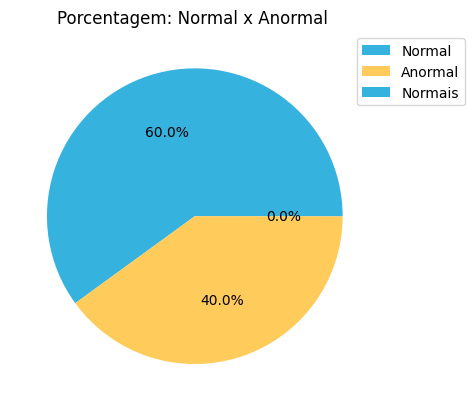

In [683]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [684]:
print(f"Quantidade de amostras Normais: {sum(train_data['CLASSE'] == 'Normal')}")
print(f"Quantidade de amostras Anormais: {sum(train_data['CLASSE'] == 'Anormal')}")

Quantidade de amostras Normais: 8137
Quantidade de amostras Anormais: 5421


In [685]:
substituir(train_data, "CLASSE", "Normais", "Normal")

In [686]:
normal_data = train_data[train_data["CLASSE"] == "Normal"]

In [687]:
normal_data["nan_count"] = normal_data.isna().sum(axis=1)
normal_data = normal_data.sort_values(by="nan_count", ascending=False)

C:\Users\PICHAU\AppData\Local\Temp\ipykernel_10580\3752332633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data["nan_count"] = normal_data.isna().sum(axis=1)


In [688]:
normal_data_reduced = normal_data.iloc[0:2716, :]

In [689]:
train_data = train_data[~train_data["Id"].isin(normal_data_reduced["Id"])]

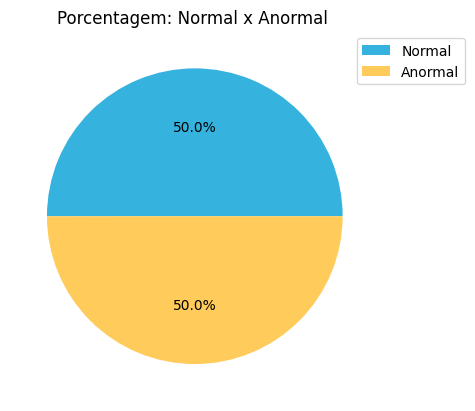

In [690]:
colors = ["#35b2de", "#ffcb5a"]  # Apenas escolhando as cores

labels = train_data["CLASSE"].value_counts().index
plt.pie(
    train_data["CLASSE"].value_counts(), autopct="%1.1f%%", colors=colors
)  # conta as ocorrências de cada classe e exibe a porcentagem
plt.legend(
    labels,
    bbox_to_anchor=(1.25, 1),
)  # Nossas Legendas
plt.title("Porcentagem: Normal x Anormal ")
plt.show()

In [691]:
all_data = pd.concat([train_data, test_data], axis=0)

In [692]:
all_data = all_data.drop(columns=['Atendimento', 'DN', 'Convenio'])

In [693]:
converter_numeric(all_data, "FC")
converter_numeric(all_data, "IDADE")

In [694]:
all_data.loc[all_data["Peso"] <= 0, "Peso"] = np.nan

In [695]:
all_data.loc[all_data["Altura"] <= 40, 'Altura'] = np.nan

In [696]:
all_data.loc[(all_data["IDADE"] <= 0) | (all_data["IDADE"] > 19), 'IDADE'] = np.nan

In [697]:
all_data.loc[(all_data["PA SISTOLICA"] > 500) | (all_data["PA SISTOLICA"] < 40), 'PA SISTOLICA'] = np.nan

In [698]:
all_data.loc[all_data["PA DIASTOLICA"] < 30, 'PA DIASTOLICA'] = np.nan

In [699]:
all_data.loc[(all_data["FC"] > 220) | (all_data["FC"] < 60), 'FC'] = np.nan

In [700]:
all_data["Peso"] = fill_na_mediana(all_data, "Peso")
all_data["Altura"] = fill_na_mediana(all_data, "Altura")
all_data["IDADE"] = fill_na_mediana(all_data, "IDADE")

In [701]:
all_data["PA DIASTOLICA"] = fill_na_mediana(all_data, "PA DIASTOLICA")
all_data["PA SISTOLICA"] = fill_na_mediana(all_data, "PA SISTOLICA")
all_data["FC"] = fill_na_mediana(all_data, "FC")

In [702]:
altura_aux = all_data["Altura"] / 100


all_data["IMC"] = all_data["Peso"] / np.power(altura_aux, 2)

In [703]:
all_data.isna().sum()

Id                   0
Peso                 0
Altura               0
IMC                  0
IDADE                0
PULSOS            1177
PA SISTOLICA         0
PA DIASTOLICA        0
PPA                180
B2                1162
SOPRO             1152
FC                   0
HDA 1             4321
HDA2             14540
SEXO                 2
MOTIVO1            888
MOTIVO2           3637
CLASSE            4314
dtype: int64

In [704]:
substituir(all_data, "PULSOS", "NORMAIS", "Normais")
substituir(all_data, "PULSOS", "AMPLOS", "Amplos")

In [705]:
substituir(all_data, "SOPRO", "sistólico", "Sistólico")
substituir(all_data, "SOPRO", "contínuo", "Contínuo")

In [706]:
substituir(all_data, "SEXO", "Masculino", "M")
substituir(all_data, "SEXO", "masculino", "M")
substituir(all_data, "SEXO", "Feminino", "F")

In [707]:
all_data["PULSOS"] = all_data["PULSOS"].fillna(all_data["PULSOS"].mode()[0])

In [708]:
all_data["B2"] = all_data["B2"].fillna(all_data["B2"].mode()[0])

In [709]:
all_data["SOPRO"] = all_data["SOPRO"].fillna(all_data["SOPRO"].mode()[0])

In [710]:
all_data["SEXO"] = all_data["SEXO"].fillna(all_data["SEXO"].mode()[0])

In [711]:
all_data["MOTIVO1"] = all_data["MOTIVO1"].fillna(all_data["MOTIVO1"].mode()[0])
all_data["MOTIVO2"] = all_data["MOTIVO2"].fillna(all_data["MOTIVO2"].mode()[0])

In [712]:
all_data["PPA"] = all_data["PPA"].replace("#VALUE!", np.nan)
all_data["PPA"] = all_data["PPA"].fillna(all_data["PPA"].mode()[0])

In [713]:
all_data["HDA 1"] = all_data["HDA 1"].fillna("Assintomático")
all_data["HDA2"] = all_data["HDA2"].fillna("Assintomático")

In [714]:
colunas = [
    "PULSOS",
    "PPA",
    "B2",
    "SOPRO",
    "HDA 1",
    "HDA2",
    "SEXO",
    "MOTIVO1",
    "MOTIVO2",
]

In [715]:
all_data = pd.get_dummies(all_data, columns=colunas)

In [716]:
from sklearn.preprocessing import MinMaxScaler

In [717]:
colunas_a_normalizar = ["Peso", "Altura", 'IMC', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']

In [718]:
scaler = MinMaxScaler()
all_data[colunas_a_normalizar] = scaler.fit_transform(all_data[colunas_a_normalizar])

In [719]:
all_data.head()

,Id,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,CLASSE,PULSOS_Amplos,PULSOS_Diminuídos,PULSOS_Femorais diminuidos,PULSOS_Normais,PULSOS_Outro,PPA_HAS-1 PAD,PPA_HAS-1 PAS,PPA_HAS-2 PAD,PPA_HAS-2 PAS,PPA_Normal,PPA_Não Calculado,PPA_Pre-Hipertensão PAD,PPA_Pre-Hipertensão PAS,B2_Desdob fixo,B2_Hiperfonética,B2_Normal,B2_Outro,B2_Única,SOPRO_Contínuo,SOPRO_Sistolico e diastólico,SOPRO_Sistólico,SOPRO_ausente,SOPRO_diastólico,HDA 1_Assintomático,HDA 1_Cianose,HDA 1_Desmaio/tontura,HDA 1_Dispneia,HDA 1_Dor precordial,HDA 1_Ganho de peso,HDA 1_Outro,HDA 1_Palpitacao,HDA2_Assintomático,HDA2_Cianose,HDA2_Desmaio/tontura,HDA2_Dispneia,HDA2_Dor precordial,HDA2_Ganho de peso,HDA2_Outro,HDA2_Palpitacao,SEXO_F,SEXO_Indeterminado,SEXO_M,MOTIVO1_1 - Cardiopatia já estabelecida,MOTIVO1_2 - Check-up,MOTIVO1_5 - Parecer cardiológico,MOTIVO1_6 - Suspeita de cardiopatia,MOTIVO1_7 - Outro,MOTIVO2_1 - Cardiopatia adquirida,MOTIVO2_1 - Cardiopatia congenica,MOTIVO2_5 - Atividade física,MOTIVO2_5 - Cirurgia,MOTIVO2_5 - Uso de cisaprida,MOTIVO2_6 - Alterações de pulso/perfusão,MOTIVO2_6 - Cansaço,MOTIVO2_6 - Cardiopatia na familia,MOTIVO2_6 - Cianose,MOTIVO2_6 - Cianose e dispnéia,MOTIVO2_6 - Dispnéia,MOTIVO2_6 - Dor precordial,MOTIVO2_6 - HAS/dislipidemia/obesidade,MOTIVO2_6 - Palpitação/taquicardia/arritmia,MOTIVO2_6 - Sopro,MOTIVO2_Outro
0,10524,0.176771,0.522293,0.024656,0.305820,0.384615,0.529412,0.259740,Normal,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,17249,0.202297,0.484076,0.031220,0.640212,0.307692,0.294118,0.259740,Anormal,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,4483,0.081047,0.292994,0.022860,0.116402,0.307692,0.294118,0.259740,Anormal,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
5,15430,0.285258,0.764331,0.023109,0.401587,0.461538,0.411765,0.129870,Normal,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
6,1023,0.116146,0.407643,0.022327,0.207407,0.230769,0.294118,0.207792,Normal,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [720]:
all_data["CLASSE"] = all_data["CLASSE"].map({"Normal": 0, "Anormal": 1})

In [721]:
from sklearn.cluster import KMeans

In [722]:
data_kmeans = all_data.drop(columns=['Id', 'CLASSE'])
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_kmeans)

KMeans(n_clusters=4, random_state=42)

In [723]:
rotulos = kmeans.labels_
centroides = kmeans.cluster_centers_

In [724]:
all_data["CLUSTER"] = rotulos

In [725]:
train_data = all_data.merge(train_data, on="Id", how="right")

In [726]:
train_data = pd.read_csv("./data/train.csv")
ids_treino = train_data["Id"]
train_data = all_data[all_data["Id"].isin(ids_treino)]
train_data = train_data.dropna(subset=["CLASSE"])

In [727]:
train_data.head(5)

,Id,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,CLASSE,PULSOS_Amplos,PULSOS_Diminuídos,PULSOS_Femorais diminuidos,PULSOS_Normais,PULSOS_Outro,PPA_HAS-1 PAD,PPA_HAS-1 PAS,PPA_HAS-2 PAD,PPA_HAS-2 PAS,PPA_Normal,PPA_Não Calculado,PPA_Pre-Hipertensão PAD,PPA_Pre-Hipertensão PAS,B2_Desdob fixo,B2_Hiperfonética,B2_Normal,B2_Outro,B2_Única,SOPRO_Contínuo,SOPRO_Sistolico e diastólico,SOPRO_Sistólico,SOPRO_ausente,SOPRO_diastólico,HDA 1_Assintomático,HDA 1_Cianose,HDA 1_Desmaio/tontura,HDA 1_Dispneia,HDA 1_Dor precordial,HDA 1_Ganho de peso,HDA 1_Outro,HDA 1_Palpitacao,HDA2_Assintomático,HDA2_Cianose,HDA2_Desmaio/tontura,HDA2_Dispneia,HDA2_Dor precordial,HDA2_Ganho de peso,HDA2_Outro,HDA2_Palpitacao,SEXO_F,SEXO_Indeterminado,SEXO_M,MOTIVO1_1 - Cardiopatia já estabelecida,MOTIVO1_2 - Check-up,MOTIVO1_5 - Parecer cardiológico,MOTIVO1_6 - Suspeita de cardiopatia,MOTIVO1_7 - Outro,MOTIVO2_1 - Cardiopatia adquirida,MOTIVO2_1 - Cardiopatia congenica,MOTIVO2_5 - Atividade física,MOTIVO2_5 - Cirurgia,MOTIVO2_5 - Uso de cisaprida,MOTIVO2_6 - Alterações de pulso/perfusão,MOTIVO2_6 - Cansaço,MOTIVO2_6 - Cardiopatia na familia,MOTIVO2_6 - Cianose,MOTIVO2_6 - Cianose e dispnéia,MOTIVO2_6 - Dispnéia,MOTIVO2_6 - Dor precordial,MOTIVO2_6 - HAS/dislipidemia/obesidade,MOTIVO2_6 - Palpitação/taquicardia/arritmia,MOTIVO2_6 - Sopro,MOTIVO2_Outro,CLUSTER
0,10524,0.176771,0.522293,0.024656,0.305820,0.384615,0.529412,0.259740,0.0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,3
1,17249,0.202297,0.484076,0.031220,0.640212,0.307692,0.294118,0.259740,1.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,3
2,4483,0.081047,0.292994,0.022860,0.116402,0.307692,0.294118,0.259740,1.0,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,3
5,15430,0.285258,0.764331,0.023109,0.401587,0.461538,0.411765,0.129870,0.0,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0
6,1023,0.116146,0.407643,0.022327,0.207407,0.230769,0.294118,0.207792,0.0,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,1


In [728]:
test_data = pd.read_csv("./data/test.csv")
ids_test = test_data["Id"]
test_data = all_data[all_data["Id"].isin(ids_test)]
test_data = test_data.drop(columns='CLASSE')

In [729]:
test_data.head(5)

,Id,Peso,Altura,IMC,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,PULSOS_Amplos,PULSOS_Diminuídos,PULSOS_Femorais diminuidos,PULSOS_Normais,PULSOS_Outro,PPA_HAS-1 PAD,PPA_HAS-1 PAS,PPA_HAS-2 PAD,PPA_HAS-2 PAS,PPA_Normal,PPA_Não Calculado,PPA_Pre-Hipertensão PAD,PPA_Pre-Hipertensão PAS,B2_Desdob fixo,B2_Hiperfonética,B2_Normal,B2_Outro,B2_Única,SOPRO_Contínuo,SOPRO_Sistolico e diastólico,SOPRO_Sistólico,SOPRO_ausente,SOPRO_diastólico,HDA 1_Assintomático,HDA 1_Cianose,HDA 1_Desmaio/tontura,HDA 1_Dispneia,HDA 1_Dor precordial,HDA 1_Ganho de peso,HDA 1_Outro,HDA 1_Palpitacao,HDA2_Assintomático,HDA2_Cianose,HDA2_Desmaio/tontura,HDA2_Dispneia,HDA2_Dor precordial,HDA2_Ganho de peso,HDA2_Outro,HDA2_Palpitacao,SEXO_F,SEXO_Indeterminado,SEXO_M,MOTIVO1_1 - Cardiopatia já estabelecida,MOTIVO1_2 - Check-up,MOTIVO1_5 - Parecer cardiológico,MOTIVO1_6 - Suspeita de cardiopatia,MOTIVO1_7 - Outro,MOTIVO2_1 - Cardiopatia adquirida,MOTIVO2_1 - Cardiopatia congenica,MOTIVO2_5 - Atividade física,MOTIVO2_5 - Cirurgia,MOTIVO2_5 - Uso de cisaprida,MOTIVO2_6 - Alterações de pulso/perfusão,MOTIVO2_6 - Cansaço,MOTIVO2_6 - Cardiopatia na familia,MOTIVO2_6 - Cianose,MOTIVO2_6 - Cianose e dispnéia,MOTIVO2_6 - Dispnéia,MOTIVO2_6 - Dor precordial,MOTIVO2_6 - HAS/dislipidemia/obesidade,MOTIVO2_6 - Palpitação/taquicardia/arritmia,MOTIVO2_6 - Sopro,MOTIVO2_Outro,CLUSTER
0,8957,0.026803,0.082803,0.020510,0.007407,0.307692,0.294118,0.324675,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2
1,4246,0.268666,0.694268,0.025110,0.657143,0.307692,0.294118,0.155844,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,0
2,9089,0.113593,0.401274,0.022265,0.201587,0.538462,0.647059,0.259740,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,0
3,10606,0.047224,0.484076,0.007288,0.038095,0.307692,0.294118,0.246753,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1
4,9863,0.100191,0.484076,0.015462,0.210582,0.307692,0.294118,0.194805,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,2


In [730]:
X = train_data.drop(columns=['CLASSE', 'Id'])
y = train_data['CLASSE']

In [731]:
y.isna().sum()

np.int64(0)

In [732]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [733]:
from sklearn.ensemble import RandomForestClassifier

In [734]:
model = RandomForestClassifier(n_estimators=300, random_state=42)

In [735]:
scores = cross_val_score(model, X, y, cv=10)

In [736]:
print(f"Pontuação média de acurácia: {scores.mean() * 100:.2f}%")
print(f"Desvio padrão da acurácia: {scores.std() * 100:.2f}%")

Pontuação média de acurácia: 92.50%
Desvio padrão da acurácia: 0.32%


In [737]:
for i in scores:
    print(f"{(i * 100):.2f}%")

92.90%
92.53%
91.89%
92.07%
92.80%
92.62%
92.80%
92.44%
92.71%
92.25%
